# Barplot of README page content

Import the libraries we need

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns

Import the CSV file for readme pages

In [2]:
readme_pages = pd.read_csv('data/readme_pages.csv', header=0)

Sum the number of elemenets across organizations

In [3]:
readme_pages_totals = readme_pages.sum()
print(readme_pages_totals)

organization_or_project_name             Darwin CoreEMLEcological Trait Data StandardMI...
getting_started                                                                         12
about_section                                                                           29
how_to_contribute                                                                       16
history                                                                                  6
copyright_information                                                                   12
funding_and_acknowledgements                                                             7
visual_structure_of_repo                                                                 7
recommended_citation                                                                    10
archived_version_and_upcoming_version                                                   11
resources                                                                                6

Remove the header since we're going to replace this anyways

In [4]:
readme_new_labels = readme_pages_totals.drop("organization_or_project_name")
readme_new_labels.head()

getting_started          12
about_section            29
how_to_contribute        16
history                   6
copyright_information    12
dtype: object

Conver the series to a dataframe, and add in new header for plotting

In [5]:
readme_pages_df = pd.DataFrame({'README_elements':readme_new_labels.index, 'count':readme_new_labels.values})
readme_pages_df

,README_elements,count
0,getting_started,12
1,about_section,29
2,how_to_contribute,16
3,history,6
4,copyright_information,12
5,funding_and_acknowledgements,7
6,visual_structure_of_repo,7
7,recommended_citation,10
8,archived_version_and_upcoming_version,11
9,resources,6


take percent of each element compared to overall number of organizations

In [6]:
readme_pages_df['percent'] = (readme_pages_df['count'] / (len(readme_pages.index))) * 100
print(readme_pages_df)

                         README_elements count percent
0                        getting_started    12    37.5
1                          about_section    29  90.625
2                      how_to_contribute    16      50
3                                history     6   18.75
4                  copyright_information    12    37.5
5           funding_and_acknowledgements     7  21.875
6               visual_structure_of_repo     7  21.875
7                   recommended_citation    10   31.25
8  archived_version_and_upcoming_version    11  34.375
9                              resources     6   18.75


Arrange dataframe into descending order

In [7]:
result = readme_pages_df.sort_values('percent', ascending=False)
print(result)

                         README_elements count percent
1                          about_section    29  90.625
2                      how_to_contribute    16      50
0                        getting_started    12    37.5
4                  copyright_information    12    37.5
8  archived_version_and_upcoming_version    11  34.375
7                   recommended_citation    10   31.25
5           funding_and_acknowledgements     7  21.875
6               visual_structure_of_repo     7  21.875
3                                history     6   18.75
9                              resources     6   18.75


Make plot using `seaborn` library

(0.0, 100.0)

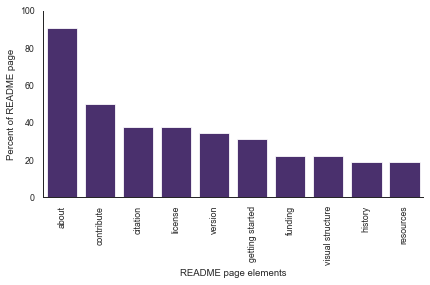

In [8]:
sns.set_style("white")
sns.set_context("paper")
readme_barplot = sns.barplot(x="README_elements", 
                                y = "percent", 
                                data = readme_pages_df, 
                                color="#482677FF",
                               order = result['README_elements'])
readme_barplot.set(xlabel = "README page elements", 
                      ylabel = "Percent of README page")
readme_barplot.set_xticklabels(readme_barplot.get_xticklabels(), 
                                  rotation=90)
readme_barplot.set_xticklabels(['about','contribute','citation','license','version','getting started','funding','visual structure','history','resources'])
sns.despine(top=True)
plt.tight_layout(h_pad=2)
plt.ylim(0,100)